In [1]:
import os
script_name = 'run_script.ipynb'
dir_path = os.path.dirname(os.path.realpath(script_name))
parent_path = os.path.dirname(dir_path)
savemodel_path = os.path.join(parent_path,'model')
loaddata_path = os.path.join(parent_path,'data')
headfile_path = os.path.join(parent_path,'headfile')

In [2]:
import sys
sys.path.append(savemodel_path)
sys.path.append(loaddata_path)
sys.path.append(headfile_path)

In [3]:
from load_data import TOF_SM_Dataset,ToTensor
from build_network import TEST_NET_1,FULLY_CONV_NET
from model_utils import load_model,save_model
from run_network import train, test,train_onebyone
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2 as cv
import os
from torch import nn, optim
from torchvision import transforms, utils
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from skimage.measure import compare_ssim as ssim
import csv
%matplotlib inline

In [4]:
path = os.path.join(loaddata_path,'tr_dataset_10um_50')
input_channel = 50
batch_size = 10
training_dataset = TOF_SM_Dataset(path, dataset_type = 'single',
                                  input_name='input',output_name='output', 
                                  transform=ToTensor())
training_dataloader = DataLoader(training_dataset, batch_size=batch_size,shuffle=True, num_workers=6)
training_datasize = len(training_dataset)
print(training_datasize)

2000


In [5]:
device = torch.device("cuda:1")

In [6]:
model = FULLY_CONV_NET(input_channel)
model.to(device)

criterion = nn.MSELoss()
lr_init = 1e-4
lr = lr_init
lr_stop = 1e-10
lr_decay = 0.1
optimizer = optim.Adam(model.parameters(), lr=lr)
num_epochs = 10000

In [7]:
NET_NAME = 'FULLY_CONV_NET'
dirname = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'_'+NET_NAME
assert os.path.exists(os.path.join(savemodel_path,dirname))

In [45]:
epoch = 9999
filename = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'epoch_'+str(epoch)+'_'+NET_NAME+'.pth'
load_model(model = model, path = os.path.join(savemodel_path,dirname), model_name = filename, mode = "single")

loaded /home/weixin/Documents/DeepLearning/Tensorflow_sample/2018summer/deconvolution/model/inputs_50dataset_2000_FULLY_CONV_NET/inputs_50dataset_2000epoch_9999_FULLY_CONV_NET.pth


In [46]:
# NET_NAME = 'FULLY_CONV_NET'
# dirname = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'_'+NET_NAME
# if not os.path.exists(os.path.join(savemodel_path,dirname)):
#     os.makedirs(os.path.join(savemodel_path,dirname))
    
# loss_store = []
# loss_comparison_len = 20
# start_ratio = 3
# for epoch in range(num_epochs):
#     tmp_loss = train_onebyone(training_dataloader,model,criterion, optimizer,device)
#     tmp_loss = tmp_loss.data[0]
#     if len(loss_store) > start_ratio*loss_comparison_len:
#         if np.mean(loss_store[-20:]) < tmp_loss:
#             loss_store = []
#             lr = lr*lr_decay
#             if lr < lr_stop:
#                 print('converge!!!!!!')
#                 break
#             optimizer = optim.Adam(model.parameters(), lr=lr)
#         else:
#             loss_store.append(tmp_loss)
#     if epoch < 100: 
#         print('Epoch[{}/{}], loss: {:.6f}'
#                   .format(epoch+1, num_epochs, tmp_loss))
#     elif (epoch+1) % 100 == 0:
#         print('Epoch[{}/{}], loss: {:.6f}'
#                   .format(epoch+1, num_epochs, tmp_loss))
#     if (epoch+1) % 500 == 0:
#         filename = 'inputs_'+str(input_channel)+'dataset_'+str(training_datasize)+'epoch_'+str(epoch)+'_'+NET_NAME+'.pth'
#         save_model(model, optimizer, path = os.path.join(savemodel_path,dirname), filename=filename) 

In [47]:
# train(train_loader=training_dataloader,model=model,criterion=criterion, optimizer=optimizer, num_epochs=num_epochs,
#       device=device, path = savemodel_path, input_channel=input_channel,training_datasize=training_datasize,NET_NAME='TEST_NET_1')

In [48]:
test_path = os.path.join(loaddata_path,'t_dataset_10um_50')
testing_dataset = TOF_SM_Dataset(test_path, dataset_type = 'single',input_name='input',output_name='output',transform=ToTensor())
testing_datasize = len(testing_dataset)
testing_dataloader = DataLoader(testing_dataset, batch_size=testing_datasize,shuffle=False, num_workers=1)

In [49]:
predict_test,gt_test = test(testing_dataloader,model,device)

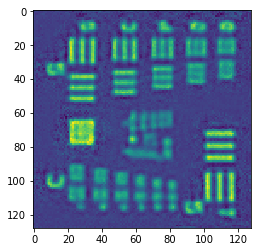

In [50]:
plt.imshow(predict_test[0,0])

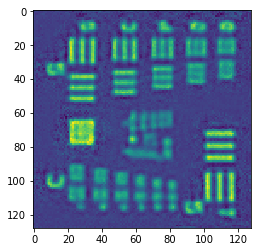

In [51]:
plt.imshow(predict_test[0,0])#999

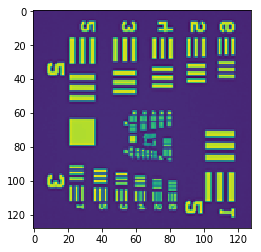

In [18]:
plt.imshow(gt_test[0,0])

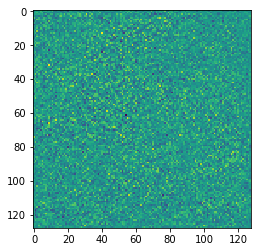

In [16]:
plt.imshow(gt_test[3,0]-predict_test[3,0])